In [1]:
import pandas as pd
from main import main, Config
import matplotlib.pyplot as plt
import random

plt.rcParams["figure.figsize"] = (16,10)


In [2]:
timer = 0

df = pd.DataFrame()
for x in [450, 300, 150, 100, 50]:
    random.seed(10)
    config_obj = Config(width=100,
                        height=100,
                        normal_vessels_count=x,
                        rogue_vessels_count=10,
                        ground_stations_count=0,
                        clique_dist=10,
                        time_quanta=0.01,
                        ttl_acknowledgement=0.1,
                        timer=0,
                        pause_every_quanta=False,
                        show_graph=False)
    name = f'Normal {config_obj.normal_vessels_count} Rogue {config_obj.rogue_vessels_count}'
    print(f'\n --------{name}-------')
    curr_df, packet_df, normal_vessels, rplt = main(config_obj)
    curr_series = curr_df.apply(lambda x: x.sum()/curr_df.shape[0] * 100)
    curr_series.name = name
    df[curr_series.name] = curr_series
    


 --------Normal 450 Rogue 10-------
1.09 >>> broadcasts left: 0409
 --------Normal 300 Rogue 10-------
0.94 >>> broadcasts left: 029
 --------Normal 150 Rogue 10-------
0.51 >>> broadcasts left: 01
 --------Normal 100 Rogue 10-------
0.93 >>> broadcasts left: 00
 --------Normal 50 Rogue 10-------


In [3]:
df.to_csv('/home/naveennvrgup/projects/SMR-results/old_load_fixed_rouge.csv')

In [10]:
df = pd.read_csv("/home/naveennvrgup/projects/SMR-results/new_load_fixed_rouge.csv")

In [11]:
df.set_index('Unnamed: 0',inplace=True)

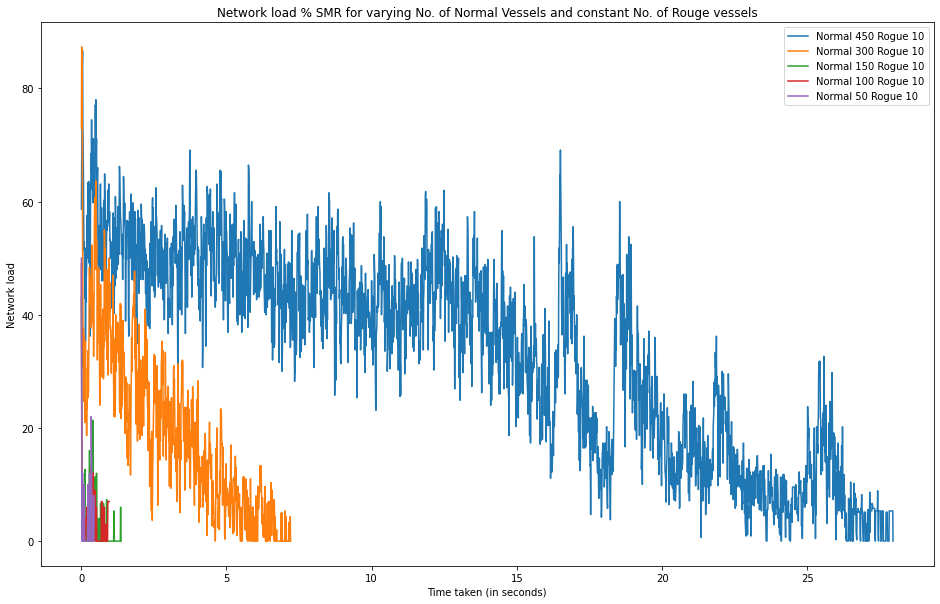

In [12]:
for i in range(df.shape[1]):
    df.iloc[:,i].plot(
        legend=True, 
        title='Network load % VANET for varying No. of Normal Vessels and constant No. of Rouge vessels', 
        xlabel='Time taken (in seconds)',
        ylabel='Network load',
    )

20    AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
24    AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

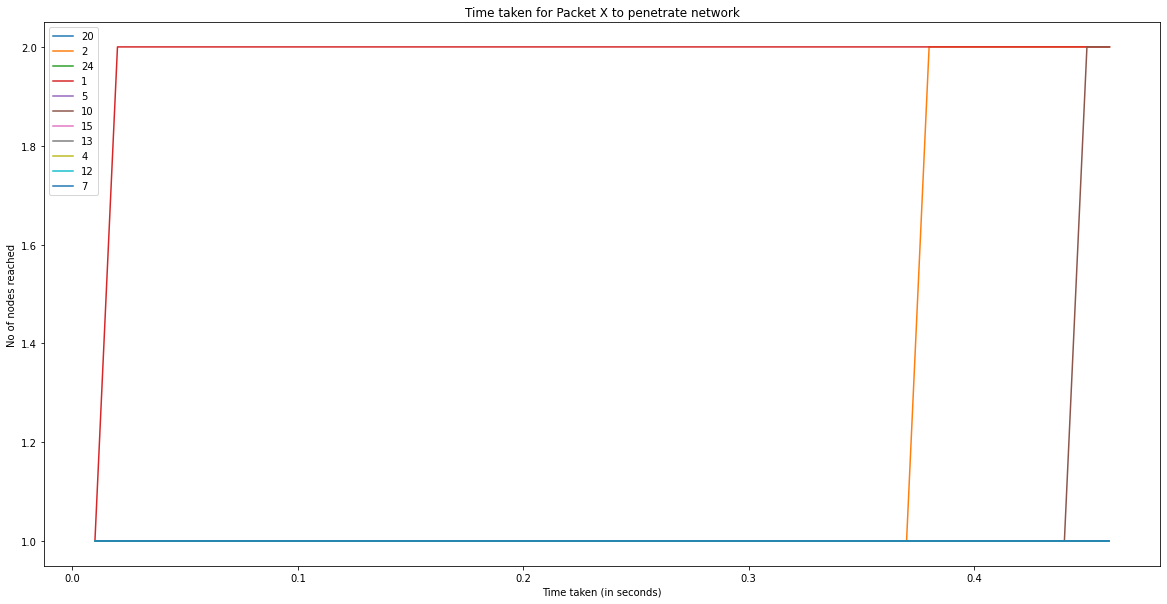

In [4]:
packet_df.T.fillna(0).apply(lambda x: x.cumsum().plot(
    legend=True,
    title='Time taken for Packet X to penetrate network',
    xlabel='Time taken (in seconds)',
    ylabel='No of nodes reached'
))

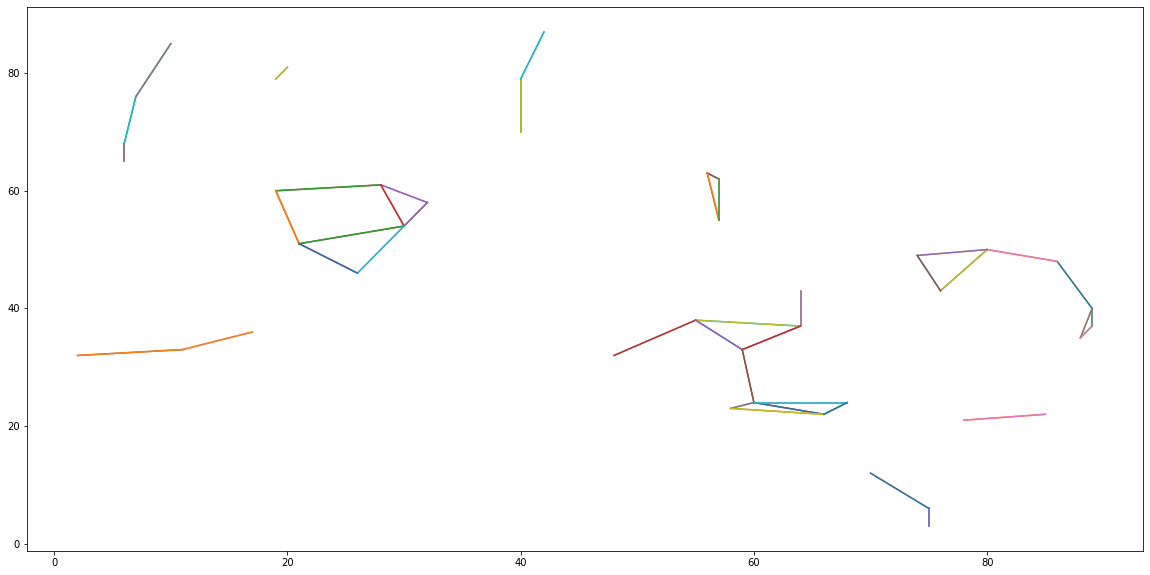

In [5]:
from utils import visualise_mesh
visualise_mesh(rplt, normal_vessels)

In [6]:
df.to_csv('./new_load_fixed_rouge.csv')